## Exploratory Data Analysis (EDA)

The goal behind this part is understandig & exploring the data in different perspectives. Out from the studies that will be done on the dataset, we can draw conclusions before building our ML model.

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Dataset

In [3]:
all_data = pd.read_csv('../Data Cleaning/cleaned_data.csv')
all_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16885.0
1,18,male,33.770,1,0,southeast,1726.0
2,28,male,33.000,3,0,southeast,4449.0
3,33,male,22.705,0,0,northwest,21984.0
4,32,male,28.880,0,0,northwest,3867.0


In [4]:
all_data.shape

(1338, 7)

### Correlation

In [5]:
all_data.corr()

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299009
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067997
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299009,0.198341,0.067997,0.787251,1.000000


<AxesSubplot:>

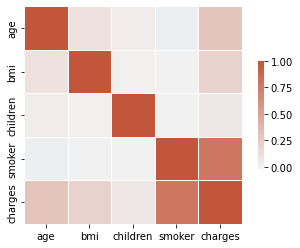

In [6]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(all_data.corr(), cmap = cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Obviously, there is a correlation between (age, charges) & (smoker, charges)

### Exploring the Distribution of Sex & Smoker Among the Data

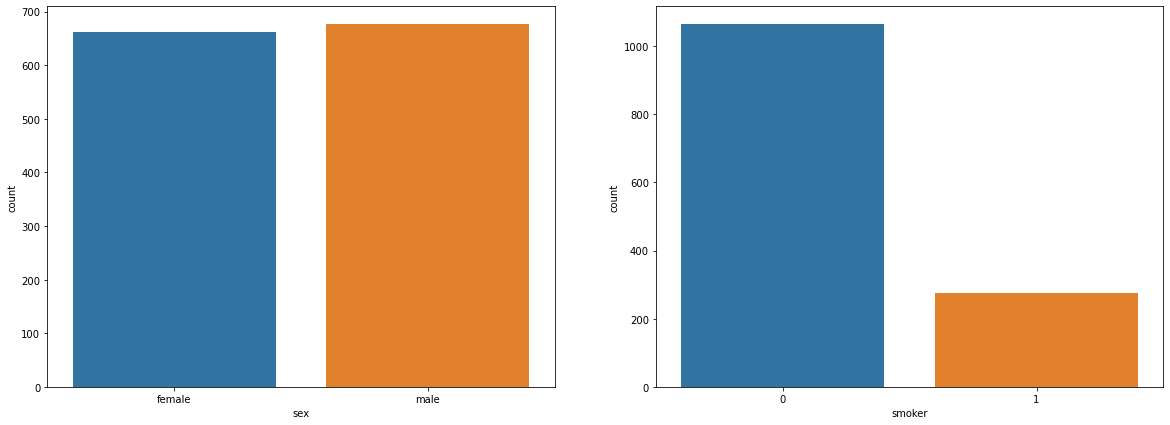

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

sns.countplot(x='sex',data=all_data,ax=ax[0])
sns.countplot(x='smoker',data=all_data,ax=ax[1])

plt.show()

As you can see, in the first figure we have a kind of equilibrium between female and male. In contrast, in the second figure the number of non-smokers is approximately about 4x the number of smokers.

Idea To Be Implemented:

We can add some privileges or customized offers to non-smokers so we can make an advantage of their noticeable number.

Example:

Adding a free gym membership offer in "X" gym, so in this way you can grab more non-smokers customers to your health insurance company. 

### Visualize Some  Features

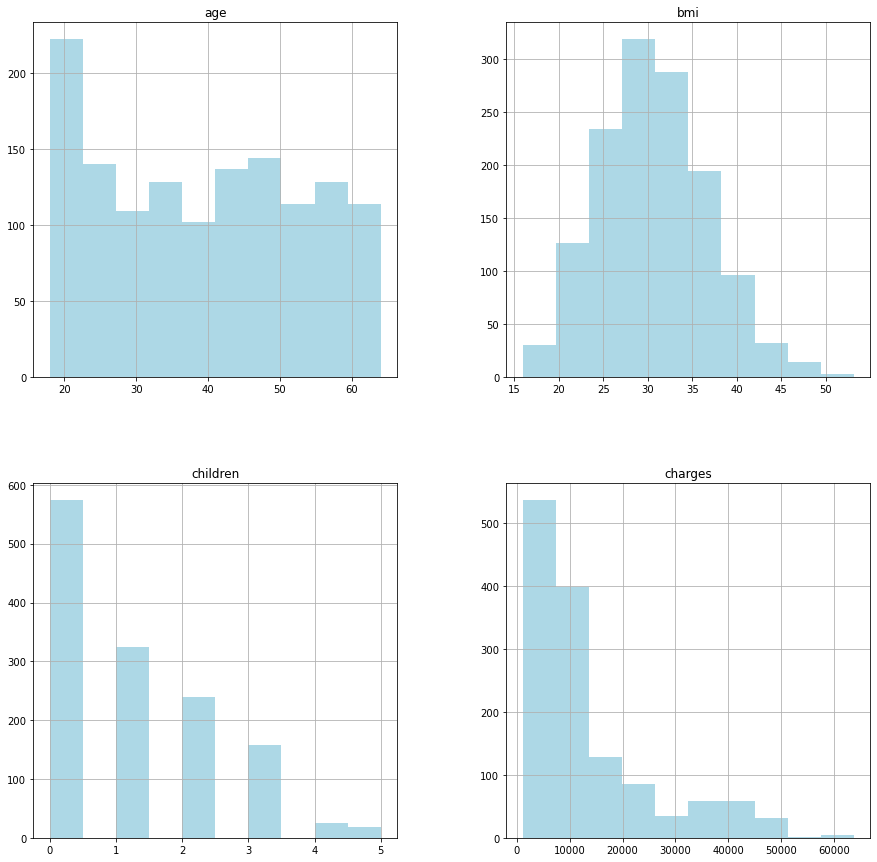

In [8]:
all_data[['age',  'bmi', 'children', 'charges']].hist(figsize=(15,15), color='lightblue')
plt.show()

Age:

Customers of age between 19 & 22 are the dominant part among the rest of customers, the rest of age ranges are approximately of the same number with small differences. We can consider ages between 19 & 22 as university students, so in this way we can increase marketing among universities to grab as much young people as we can.

Bmi:

Follows a normal distribution.

Children:

Apparently, people with no children are the highest.

Charges:

We can see that the small portion of customers have the highest charges among others.

### Grouping Different Features WRT Charges

In [9]:
features = ["sex", "smoker", "region"]

for ft in features:
    info = all_data.groupby(ft)["charges"].mean().round(2)
    print(info)

sex
female    12569.58
male      13956.73
Name: charges, dtype: float64
smoker
0     8434.26
1    32050.23
Name: charges, dtype: float64
region
northeast    13406.35
northwest    12417.58
southeast    14735.41
southwest    12346.93
Name: charges, dtype: float64


Smokers have a charge way higher than non-smokers, which totally makes sense since smokers will pay more for life insurance than non-smokers due to the increased health risks of smoking, while for sex and region, all their different values are close to each other. 

### Discovering How Cost Varies WRT Age

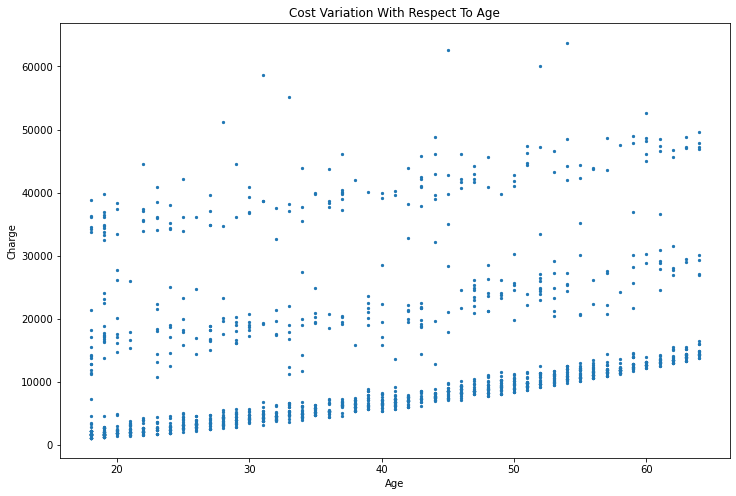

In [10]:
x = all_data["age"]
y = all_data["charges"]

plt.figure(figsize=(12,8))
plt.title('Cost Variation With Respect To Age')
plt.ylabel('Charge')
plt.xlabel('Age')
#plt.xticks(x,rotation='vertical')

cost_wrt_age_fig = plt.scatter(x, y, s = 5)
cost_wrt_age_fig

We can conclude that older customers charged with a higher cost.

p

In [14]:
pd.pivot_table(all_data, index="charges", values=["age", "bmi"]).sort_values("charges", ascending=False)

,age,bmi
charges,,
63770.0,54.0,47.410
62593.0,45.0,30.360
60021.0,52.0,34.485
58571.0,31.0,38.095
55135.0,33.0,35.530
...,...,...
1141.0,18.0,37.290
1137.0,18.0,34.265
1136.0,18.0,33.495


In [17]:
pd.pivot_table(all_data, index=[ "smoker", "age", "bmi"], values=["charges"]).sort_values("charges", ascending = False)

charges
smoker age bmi            
1      54  47.410  63770.0
       45  30.360  62593.0
       52  34.485  60021.0
       31  38.095  58571.0
       33  35.530  55135.0
...                    ...
0      18  34.100   1137.0
           33.330   1136.0
           33.660   1136.0
           30.140   1132.0
           23.210   1122.0

[1309 rows x 1 columns]

In [86]:
# group_sex_smoker_region_against_charges = all_data.groupby(["sex","smoker","region"])["charges"].mean().round(2)
# group_sex_smoker_region_against_charges

#group_sex_smoker_region_against_charges.plot(kind="bar", figsize=(15,7), color='lightblue')